s='[1*]CCC.[2*]O.[3*]C.[4*]C.[5*]OO'


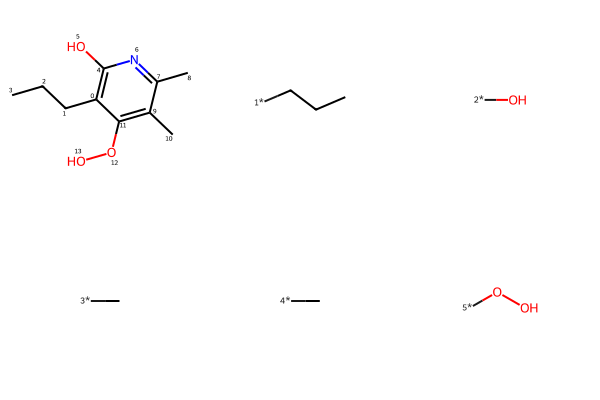

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import Draw

ms = [Chem.MolFromSmiles(s) for s in ('c1cnccc1','c(CCC)1c(O)nc(C)c(C)c(OO)1')]
core = ms[0]

res = Chem.ReplaceCore(ms[1],core)
s = Chem.MolToSmiles(res)
print(f"{s=}")
frags = Chem.GetMolFrags(res,asMols=True)
frags_as_mols = [Chem.MolToSmiles(x) for x in frags]
for atom in ms[1].GetAtoms():
    # print(f"  Atom {atom.GetIdx()} is {atom.GetSymbol()}")
    # For each atom, set the property "atomNote" to index of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()))
Draw.MolsToGridImage([ms[1], *frags], useSVG=True)

s_labelByIndex='*CCC.[1*]O.[3*]C.[4*]C.[5*]OO'


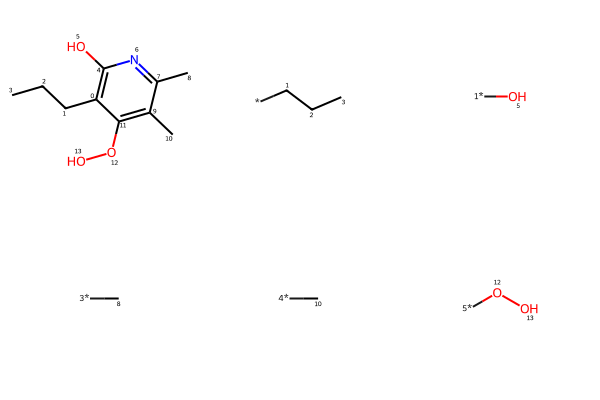

In [2]:
res_labelByIndex = Chem.ReplaceCore(ms[1],core,labelByIndex=True)
s_labelByIndex = Chem.MolToSmiles(res_labelByIndex)
print(f"{s_labelByIndex=}")
frags_labelByIndex = Chem.GetMolFrags(res_labelByIndex,asMols=True)
frags_as_mols_labelByIndex = [Chem.MolToSmiles(x) for x in frags_labelByIndex]

for atom in ms[1].GetAtoms():
    # print(f"  Atom {atom.GetIdx()} is {atom.GetSymbol()}")
    # For each atom, set the property "atomNote" to index of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()))
Draw.MolsToGridImage([ms[1], *frags_labelByIndex], useSVG=True)

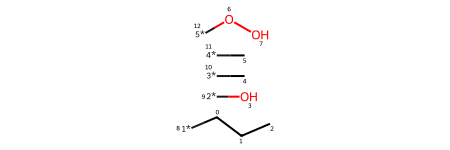

In [3]:
for atom in res.GetAtoms():
    # print(f"  Atom {atom.GetIdx()} is {atom.GetSymbol()}")
    # For each atom, set the property "atomNote" to index of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()))
res

In [4]:
rgd,_ = rdRGroupDecomposition.RGroupDecompose([core],ms,asSmiles=True)
rgd

[{'Core': 'n1c([*:3])c([*:2])c([*:1])c([*:5])c1[*:4]',
  'R1': '[H][*:1]',
  'R2': '[H][*:2]',
  'R3': '[H][*:3]',
  'R4': '[H][*:4]',
  'R5': '[H][*:5]'},
 {'Core': 'n1c([*:3])c([*:2])c([*:1])c([*:5])c1[*:4]',
  'R1': 'OO[*:1]',
  'R2': 'CCC[*:2]',
  'R3': 'O[*:3]',
  'R4': 'C[*:4]',
  'R5': 'C[*:5]'}]

In [5]:
m1 = Chem.MolFromSmiles('c1c(CCO)ncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp=Chem.ReplaceCore(m1,core,labelByIndex=True)

for atom in m1.GetAtoms():
    print(f"  Atom {atom.GetIdx()} is {atom.GetSymbol()}")
    atom.SetProp("atomNote", str(atom.GetIdx()))
frags_labelByIndex = Chem.GetMolFrags(tmp,asMols=True)

frags_labelByIndex
[Chem.MolToSmiles(frag) for frag in frags_labelByIndex]

  Atom 0 is C
  Atom 1 is C
  Atom 2 is C
  Atom 3 is C
  Atom 4 is O
  Atom 5 is N
  Atom 6 is C
  Atom 7 is N
  Atom 8 is C
  Atom 9 is C
  Atom 10 is O
  Atom 11 is O


['[1*]CCO', '[5*]C(=O)O']

In [6]:
print(Chem.MolToSmiles(tmp))

[1*]CCO.[5*]C(=O)O


  Atom 0 is C
  Atom 1 is C
  Atom 2 is N
  Atom 3 is C
  Atom 4 is N
  Atom 5 is C


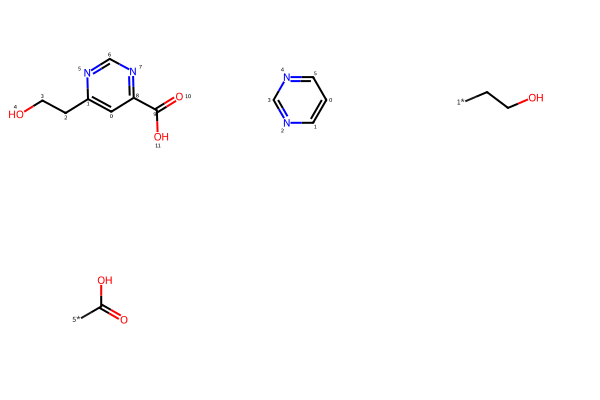

In [10]:
for atom in core.GetAtoms():
    print(f"  Atom {atom.GetIdx()} is {atom.GetSymbol()}")
    atom.SetProp("atomNote", str(atom.GetIdx()))

Draw.MolsToGridImage([m1, core, *frags_labelByIndex], useSVG=True)

['*CCC', '[2*]C']


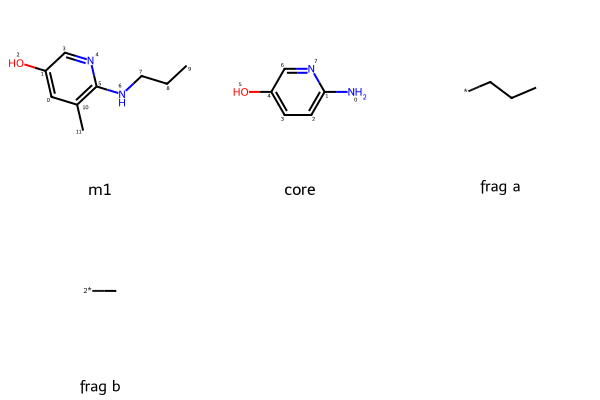

In [30]:
m1 = Chem.MolFromSmiles('c1c(O)cnc(N(CCC))c1(C)')
core = Chem.MolFromSmiles('Nc1ccc(O)cn1')
tmp=Chem.ReplaceCore(m1,core,labelByIndex=True)

for atom in core.GetAtoms():
    atom.SetProp("atomNote", str(atom.GetIdx()))
frags_labelByIndex = Chem.GetMolFrags(tmp,asMols=True)

for atom in m1.GetAtoms():
    atom.SetProp("atomNote", str(atom.GetIdx()))
frags_labelByIndex = Chem.GetMolFrags(tmp,asMols=True)

frags_labelByIndex
print([Chem.MolToSmiles(frag) for frag in frags_labelByIndex])
Draw.MolsToGridImage([m1, core, *frags_labelByIndex], legends=['m1', 'core', 'frag a', 'frag b'], useSVG=True)

['[7*]CCC', '[5*]C']


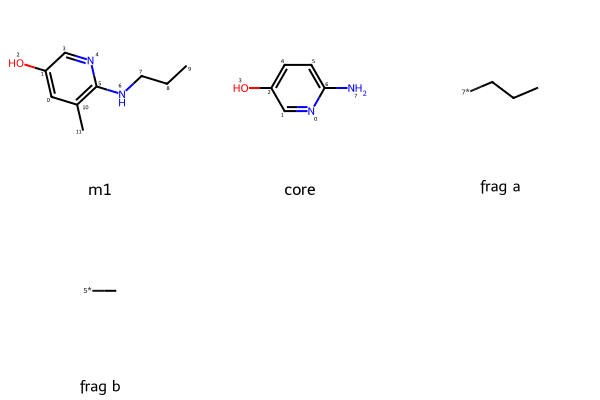

In [32]:
m1 = Chem.MolFromSmiles('c1c(O)cnc(N(CCC))c1(C)')
core = Chem.MolFromSmiles('n1cc(O)ccc1N')
tmp=Chem.ReplaceCore(m1,core,labelByIndex=True)

for atom in core.GetAtoms():
    atom.SetProp("atomNote", str(atom.GetIdx()))
frags_labelByIndex = Chem.GetMolFrags(tmp,asMols=True)

for atom in m1.GetAtoms():
    atom.SetProp("atomNote", str(atom.GetIdx()))
frags_labelByIndex = Chem.GetMolFrags(tmp,asMols=True)

frags_labelByIndex
print([Chem.MolToSmiles(frag) for frag in frags_labelByIndex])
Draw.MolsToGridImage([m1, core, *frags_labelByIndex], legends=['m1', 'core', 'frag a', 'frag b'], useSVG=True)

In [11]:
m1 = Chem.MolFromSmiles('c1c(O)cnc(N(F)(CCC))c1(C)')
core = Chem.MolFromSmiles('c1ccncc1')
tmp=Chem.ReplaceCore(m1,core,labelByIndex=True)

for atom in m1.GetAtoms():
    print(f"  Atom {atom.GetIdx()} is {atom.GetSymbol()}")
    atom.SetProp("atomNote", str(atom.GetIdx()))
frags_labelByIndex = Chem.GetMolFrags(tmp,asMols=True)

frags_labelByIndex
[Chem.MolToSmiles(frag) for frag in frags_labelByIndex]

  Atom 0 is C
  Atom 1 is C
  Atom 2 is O
  Atom 3 is C
  Atom 4 is N
  Atom 5 is C
  Atom 6 is N
  Atom 7 is F
  Atom 8 is C
  Atom 9 is C
  Atom 10 is C
  Atom 11 is C
  Atom 12 is C


['[1*]O', '[4*]N(F)CCC', '[5*]C']